This first week of the supervised part of machine learning is focused on the mathematical background of creating models. Therefore, during this exercise you are required to program the complete technique of gradient descent by hand. Later, we will off course just use sklearn SGDRegressor for this.

Download and load the file housing-data.txt, which you can find on assemblix2019 (/data/datasets/DS3/). This is actually just random data, but for the sake of argument we will pretend it represents the prices of houses in Groningen as a function of their sizes.

Load the data and create a scatter plot. As you will see, there seems to be a nice linear relationship between the size (on the horizontal axis) and the price (on the vertical axis).
As we have discussed, the general formula for the cost of a model is as follows:

 

Write a function compute_cost that receives a matrix X (of size ), a vector y (of size ) and a vector theta (of size ) and returns the total cost based on the formula above. For this to work correctly, you will need to add a column of 1's to the original X-matrix
When we call compute-cost with a value of theta of [0,0], the total cost will probably be extremely high. In the next step, you need to update the values of this vector in order to minimize .

As we have discussed, the technique we are using for this is gradient descent: every step of this descent, we update the values of theta as follows:

 

Make a function gradient_descent, that receives the matrix X, the vectors y and theta, the learning curve alpha and a num_iters. In this method, performs num_iters steps of the gradient descent, calculating the cost  every step and storing that in a list. After the num_iters, this function needs to return the found value of theta and the list of all the costs.

Create a plot of the values of  that compute_costs has found. Do you see a decrease in the total costs?

#we should normalze data

In [109]:
#loading The 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [110]:
data = pd.read_csv('~/Library/CloudStorage/OneDrive-HanzehogeschoolGroningen/Semester2/MachineLearning/Data/housing-data.txt')

data.head()

,size,price
0,30.0,75.760161
1,31.0,81.662679
2,32.0,60.944950
3,33.0,67.890597
4,34.0,87.957014


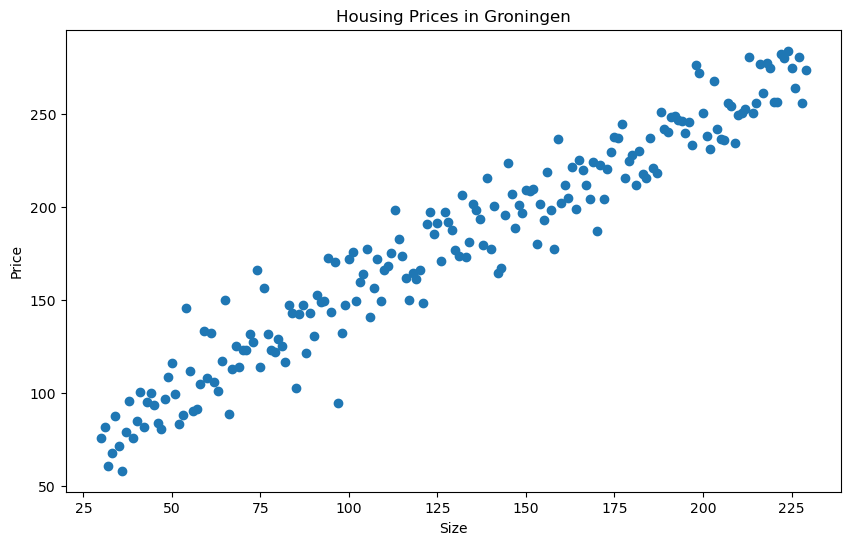

In [111]:
#plotting the data
plt.scatter(data['size'], data['price'])
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Housing Prices in Groningen')
plt.show()

In [112]:

def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    square_err = (predictions - y)**2
    return 1/(2*m) * np.sum(square_err)

In [113]:


data['intercept'] = 1
X = data[['intercept', 'size']]
y = data['price']

# # Normalize the features
X['size'] = (X['size'] - X['size'].mean()) / X['size'].std()

/var/folders/s6/jg0w44yd6ys1xqmywmt6434h0000gn/T/ipykernel_15587/2358390174.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['size'] = (X['size'] - X['size'].mean()) / X['size'].std()


In [114]:
initial_cost = compute_cost(X, y, theta)
print(initial_cost) 

0.0


In [115]:



def gradient_descent(X, y, theta, alpha, iterations):
    """
    Compute cost for linear regression
    """
    m = y.size
    cost_history = []
    theta_history = []
    for _ in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = theta - sum_delta;
        theta_history.append(theta)
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history, theta_history

In [118]:

# Initialize theta to some random values
#theta = np.random.randn(2)
theta = np.array([0.0, 0.0])

initial_cost = compute_cost(X, y, theta)
print('Initial cost: ', initial_cost)

Initial cost:  17840.780961229346


Final value of theta = intercept    155.298280
size          49.050605
dtype: float64
cost_history = [2505.70462051 2500.92036898 2496.14567682 2491.38052493 2486.62489425
 2481.87876575 2477.14212045 2472.4149394  2467.69720369 2462.98889444
 2458.28999283 2453.60048004 2448.92033734 2444.24954598 2439.58808729
 2434.93594262 2430.29309336 2425.65952093 2421.03520681 2416.42013248
 2411.81427949 2407.21762942 2402.63016387 2398.0518645  2393.48271298
 2388.92269105 2384.37178045 2379.82996299 2375.29722049 2370.77353483
 2366.2588879  2361.75326164 2357.25663804 2352.7689991  2348.29032687
 2343.82060343 2339.35981091 2334.90793146 2330.46494726 2326.03084055
 2321.6055936  2317.18918868 2312.78160815 2308.38283436 2303.99284972
 2299.61163667 2295.23917768 2290.87545526 2286.52045196 2282.17415034
 2277.83653304 2273.50758268 2269.18728196 2264.8756136  2260.57256034
 2256.27810497 2251.99223031 2247.71491922 2243.44615458 2239.18591932
 2234.9341964  2230.69096881 2226.45621957 2222

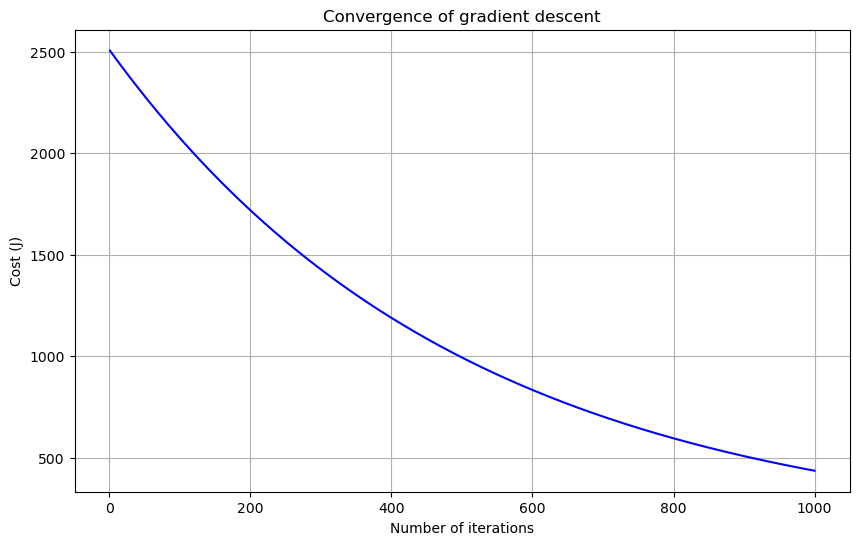

In [120]:


def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    cost_history = np.zeros(num_iters)
    theta_history = np.zeros((num_iters,2))

    for i in range(num_iters):
        prediction = np.dot(X, theta)
        theta = theta - alpha * (1/m) * (X.T.dot((prediction - y)))
        theta_history[i,:] = theta.T
        cost_history[i]  = compute_cost(X, y, theta)

    return theta, cost_history, theta_history

alpha = 0.001
num_iters = 1000

theta, cost_history, theta_history = gradient_descent(X, y, theta, alpha, num_iters)

print('Final value of theta =', theta)
print('cost_history =', cost_history)

plt.plot(range(1, num_iters + 1), cost_history, color ='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.show()

